In [266]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import xgboost as xgb


In [184]:
# load a csv called data.csv with the separation character ','

geo_data = pd.read_csv('raw_data/geo_eth.csv', sep=',')
cons_data = pd.read_csv('raw_data/cons_eth.csv', sep=',')

In [251]:
cons_data['total_cons_ann'].isna().sum()

237

In [200]:
geo_data

,household_id2,ea_id2,dist_road,dist_popcenter,dist_market,dist_borderpost,dist_admctr,pop_density,af_bio_1,af_bio_8,...,eviarea_avg,evimax_avg,grn_avg,sen_avg,h2015_eviarea,h2015_evimax,h2015_grn,h2015_sen,lat_dd_mod,lon_dd_mod
0,10101088801601002,10101088801601,50,53,105,134,198,0-50,264,258,...,46,0.432,177,257,40,0.386,173,256,14.353816,37.890876
1,10101088801601017,10101088801601,50,53,106,135,198,0-50,263,257,...,46,0.432,177,257,40,0.386,173,256,14.353816,37.890876
2,10101088801601034,10101088801601,46,49,100,135,195,0-50,262,256,...,46,0.432,177,257,40,0.386,173,256,14.353816,37.890876
3,10101088801601049,10101088801601,46,49,100,135,195,0-50,262,256,...,46,0.432,177,257,40,0.386,173,256,14.353816,37.890876
4,10101088801601064,10101088801601,46,49,100,135,195,0-50,262,256,...,46,0.432,177,257,40,0.386,173,256,14.353816,37.890876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,150102088803102072,150102088803102,0,1,1,164,1,>20000,246,264,...,24,0.227,213,264,16,0.182,228,266,9.599389,41.832341
4950,150102088803102087,150102088803102,19,53,55,111,56,0-50,238,257,...,24,0.227,213,264,16,0.182,228,266,9.746772,42.308967
4951,150102088803102099,150102088803102,19,53,55,111,56,0-50,238,257,...,24,0.227,213,264,16,0.182,228,266,9.746772,42.308967
4952,150102088803102109,150102088803102,19,53,55,111,56,0-50,238,257,...,24,0.227,213,264,16,0.182,228,266,9.746772,42.308967


In [197]:
cons_corr = cons_data.drop(columns=['household_id','household_id2','ea_id','ea_id2']).corr()

In [198]:
cons_corr[cons_corr>0.25]

,saq01,rural,pw_w3,adulteq,hh_size,no_conv,no_cons,food_cons_ann,nonfood_cons_ann,educ_cons_ann,total_cons_ann,price_index_hce,nom_totcons_aeq,cons_quint
saq01,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.627601,NaN,NaN
rural,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.336731,0.299424,NaN,0.340181,0.347208,0.426672
pw_w3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adulteq,NaN,NaN,NaN,1.000000,0.978487,NaN,NaN,NaN,NaN,NaN,0.251578,NaN,NaN,NaN
hh_size,NaN,NaN,NaN,0.978487,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_conv,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_cons,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_cons_ann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.282397,NaN,0.947533,NaN,0.750266,0.340953
nonfood_cons_ann,NaN,0.336731,NaN,NaN,NaN,NaN,NaN,0.282397,1.000000,0.360595,0.559812,NaN,0.441820,0.368158
educ_cons_ann,NaN,0.299424,NaN,NaN,NaN,NaN,NaN,NaN,0.360595,1.000000,0.359884,NaN,0.254274,NaN


In [29]:

# COUNTRIES_DIR = os.path.join("..", 'data', 'countries')

In [30]:
# def process_ethiopia():

#     consumption_pc_col = 'total_cons_ann' # per capita
#     hhsize_col = 'hh_size' # people in household

#     lat_col = 'lat_dd_mod'
#     lon_col = 'lon_dd_mod'

#     # purchasing power parity for ethiopia in 2015 (https://data.worldbank.org/indicator/PA.NUS.PRVT.PP?locations=ET)
#     ppp = 7.882
    
#     # for file in [consumption_file, geovariables_file]:
#     #     assert os.path.isfile(os.path.join(lsms_dir, file)), print(f'Could not find {file}')
    
#     df = cons_data
#     df['cons_ph'] = df[consumption_pc_col] * df[hhsize_col]
#     df['pph'] = df[hhsize_col]
#     df['cons_ph'] = df['cons_ph'] / ppp / 365
#     df = df[['household_id2', 'cons_ph', 'pph']]

#     df_geo = geo_data
#     df_cords = df_geo[['household_id2', lat_col, lon_col]]
#     df_cords.rename(columns={lat_col: 'cluster_lat', lon_col: 'cluster_lon'}, inplace=True)
#     df_combined = pd.merge(df, df_cords, on='household_id2')
#     df_combined.drop(['household_id2'], axis=1, inplace=True)
#     df_combined.dropna(inplace=True) # can't use na values
  
#     df_clusters = df_combined.groupby(['cluster_lat', 'cluster_lon']).sum().reset_index()
#     df_clusters['cons_pc'] = df_clusters['cons_ph'] / df_clusters['pph'] # divides total cluster income by people
#     df_clusters['country'] = 'eth'
#     return df_clusters[['country', 'cluster_lat', 'cluster_lon', 'cons_pc']]

In [205]:
merged_df = cons_data.merge(geo_data,how='inner',on='household_id2')
merged_df.columns

Index(['household_id', 'household_id2', 'ea_id', 'ea_id2_x', 'saq01', 'rural',
       'pw_w3', 'adulteq', 'hh_size', 'no_conv', 'no_cons', 'food_cons_ann',
       'nonfood_cons_ann', 'educ_cons_ann', 'total_cons_ann',
       'price_index_hce', 'nom_totcons_aeq', 'cons_quint', 'ea_id2_y',
       'dist_road', 'dist_popcenter', 'dist_market', 'dist_borderpost',
       'dist_admctr', 'pop_density', 'af_bio_1', 'af_bio_8', 'af_bio_12',
       'af_bio_13', 'af_bio_16', 'fsrad3_agpct', 'fsrad3_lcmaj', 'ssa_aez09',
       'srtm', 'twi', 'srtm_5_15', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6',
       'sq7', 'anntot_avg', 'wetQ_avg', 'wetQ_avgstart', 'h2015_tot',
       'h2015_wetQ', 'h2015_wetQstart', 'eviarea_avg', 'evimax_avg', 'grn_avg',
       'sen_avg', 'h2015_eviarea', 'h2015_evimax', 'h2015_grn', 'h2015_sen',
       'lat_dd_mod', 'lon_dd_mod'],
      dtype='object')

In [221]:
m_df = merged_df[['total_cons_ann','lat_dd_mod', 'lon_dd_mod']]

In [254]:
m_df.dropna(inplace=True)

/var/folders/78/kf_z610d5vvb7ch9l49_lghh0000gn/T/ipykernel_32096/3168661069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df.dropna(inplace=True)


In [255]:
import math
def create_space(lat, lon, s=1):
    """Creates a s km x s km square centered on (lat, lon)"""
    v = (180/math.pi)*(500/6378137)*s # roughly 0.045 for s=10
    return lat - v, lon - v, lat + v, lon + v

In [256]:
import rasterio

url_image = "raw_data/picture.tif"
with rasterio.open(url_image) as src:
    image_data = src.read(1)  
    transform = src.transform
    tif_array = np.squeeze(image_data)

    print(tif_array.shape)

(18000, 28800)


In [257]:
def custom_rasterio_open( min_lon, min_lat):
    xminPixel, ymaxPixel = ~transform * (min_lon, min_lat)

    xminPixel, ymaxPixel = int(xminPixel), int(ymaxPixel)
    
    return xminPixel, ymaxPixel

In [258]:
m_df.rename(columns={'total_cons_ann':'cons_pc','lat_dd_mod':'cluster_lat','lon_dd_mod':'cluster_lon'},inplace=True)

/var/folders/78/kf_z610d5vvb7ch9l49_lghh0000gn/T/ipykernel_32096/126471678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df.rename(columns={'total_cons_ann':'cons_pc','lat_dd_mod':'cluster_lat','lon_dd_mod':'cluster_lon'},inplace=True)


In [259]:
def add_nightlights(df, tif_array):
    ''' 
    This takes a dataframe with columns cluster_lat, cluster_lon and finds the average 
    nightlights in 2015 using a 10kmx10km box around the point
    
    I try all the nighlights tifs until a match is found, or none are left upon which an error is raised
    '''
    cluster_nightlights = []
    for i,r in df.iterrows():
        min_lat, min_lon, max_lat, max_lon = create_space(r.cluster_lat, r.cluster_lon)
        
        xminPixel, ymaxPixel = custom_rasterio_open(min_lon, min_lat)
        xmaxPixel, yminPixel = custom_rasterio_open(max_lon, max_lat)
        assert xminPixel < xmaxPixel, print(r.cluster_lat, r.cluster_lon)
        assert yminPixel < ymaxPixel, print(r.cluster_lat, r.cluster_lon)
        if xminPixel < 0 or xmaxPixel >= tif_array.shape[1]:
            print(f"no match for {r.cluster_lat}, {r.cluster_lon}")
            raise ValueError()
        elif yminPixel < 0 or ymaxPixel >= tif_array.shape[0]:
            print(f"no match for {r.cluster_lat}, {r.cluster_lon}")
            raise ValueError()
        xminPixel, yminPixel, xmaxPixel, ymaxPixel = int(xminPixel), int(yminPixel), int(xmaxPixel), int(ymaxPixel)
        cluster_nightlights.append(tif_array[yminPixel:ymaxPixel,xminPixel:xmaxPixel].mean())
        
    df['nightlights'] = cluster_nightlights
    df['nightlights'] = df['nightlights'].astype('float64')
    

In [260]:
add_nightlights(m_df,tif_array)

/var/folders/78/kf_z610d5vvb7ch9l49_lghh0000gn/T/ipykernel_32096/3042635974.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nightlights'] = cluster_nightlights
/var/folders/78/kf_z610d5vvb7ch9l49_lghh0000gn/T/ipykernel_32096/3042635974.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nightlights'] = df['nightlights'].astype('float64')


In [311]:
def z_score_outliers(data, threshold=3):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = [(x - mean) / std_dev for x in data]
    return np.where(np.abs(z_scores) > threshold)

In [313]:
z_score_outliers(m_df['cons_pc'])

(array([ 280,  454,  456,  495,  499,  502,  504,  536, 1118, 1165, 1581,
        1587, 1751, 1815, 1948, 2242, 2374, 2420, 2443, 2454, 2541, 2683,
        3288, 3929, 3933, 3949, 3954, 3975, 3977, 3981, 3986, 4194, 4220,
        4231, 4291, 4309, 4344, 4394, 4515, 4519, 4565, 4579, 4691, 4696]),)

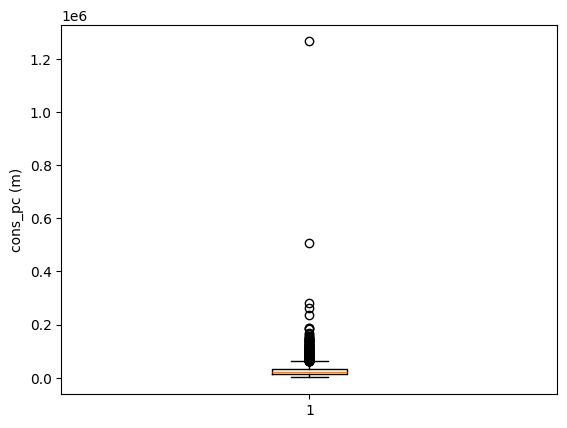

In [320]:
plt.boxplot(m_df['cons_pc'])
plt.ylabel('cons_pc (m)');

In [299]:
m_df['cons_pc_log']=m_df['cons_pc'].apply(np.log)

/var/folders/78/kf_z610d5vvb7ch9l49_lghh0000gn/T/ipykernel_32096/2880129187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df['cons_pc_log']=m_df['cons_pc'].apply(np.log)


In [304]:
m_df['rural'] = merged_df['rural']

/var/folders/78/kf_z610d5vvb7ch9l49_lghh0000gn/T/ipykernel_32096/4055436973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df['rural'] = merged_df['rural']


In [306]:
m_df.reset_index(inplace=True)

In [308]:
m_df.drop(columns='index',inplace=True)
m_df

/var/folders/78/kf_z610d5vvb7ch9l49_lghh0000gn/T/ipykernel_32096/3993068285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df.drop(columns='index',inplace=True)


,cons_pc,cluster_lat,cluster_lon,nightlights,cons_pc_log,rural
0,2983.800049,14.353816,37.890876,0.000000,8.000953,1
1,13578.200195,14.353816,37.890876,0.000000,9.516221,1
2,9280.444336,14.353816,37.890876,0.000000,9.135665,1
3,11704.000000,14.353816,37.890876,0.000000,9.367686,1
4,14974.888672,14.353816,37.890876,0.000000,9.614130,1
...,...,...,...,...,...,...
4712,34352.882812,9.746772,42.308967,0.000000,10.444441,1
4713,66544.000000,9.599389,41.832341,3.519901,11.105619,1
4714,61628.769531,9.746772,42.308967,0.000000,11.028884,1
4715,18916.132812,9.746772,42.308967,0.000000,9.847770,1


In [310]:
m_df[['cons_pc','nightlights','cons_pc_log','rural']].corr()

,cons_pc,nightlights,cons_pc_log,rural
cons_pc,1.000000,0.231471,0.693711,0.220842
nightlights,0.231471,1.000000,0.243165,0.576345
cons_pc_log,0.693711,0.243165,1.000000,0.262293
rural,0.220842,0.576345,0.262293,1.000000


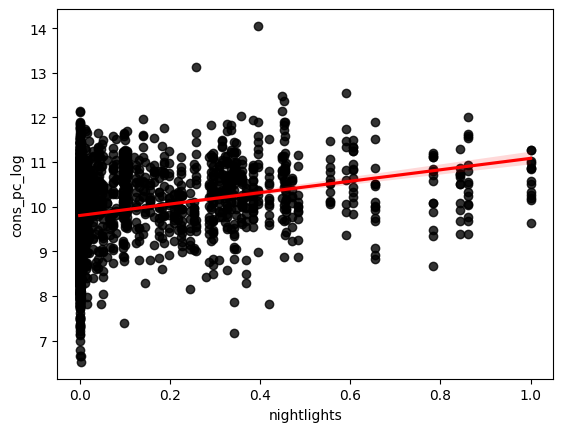

In [302]:
sns.regplot(m_df,x=X,y=m_df['cons_pc_log'],scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [303]:
m_df.corr()

,cons_pc,cluster_lat,cluster_lon,nightlights,cons_pc_log
cons_pc,1.000000,-0.022901,0.099863,0.231471,0.693711
cluster_lat,-0.022901,1.000000,0.157370,0.043378,-0.023015
cluster_lon,0.099863,0.157370,1.000000,0.092817,0.161010
nightlights,0.231471,0.043378,0.092817,1.000000,0.243165
cons_pc_log,0.693711,-0.023015,0.161010,0.243165,1.000000


In [262]:
m_df.nightlights.value_counts()

nightlights
0.000000     3343
9.744740       15
2.779349       15
19.024265      15
0.027548       15
             ... 
0.226722        1
2.723476        1
9.478632        1
1.908926        1
3.519901        1
Name: count, Length: 136, dtype: int64

In [263]:
scaler_m = MinMaxScaler()
X = pd.DataFrame(scaler_m.fit_transform(m_df[['nightlights']]))
y = m_df['cons_pc']

In [264]:
X.rename(columns={0:'nightlights'},inplace=True)

(0.0, 600000.0)

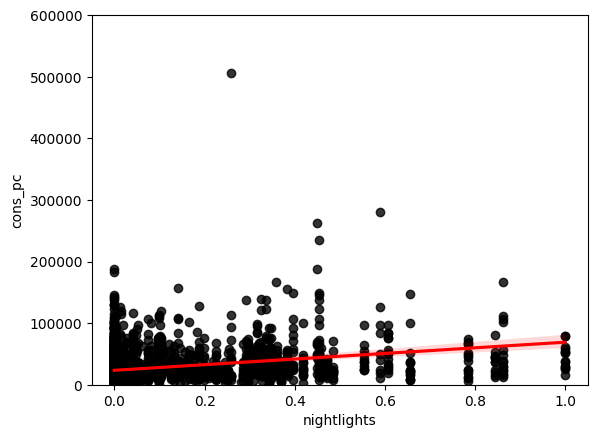

In [276]:
sns.regplot(m_df,x=X,y=y,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.ylim(0,600000)

In [291]:
model_w_0s = LinearRegression()

# Define cross-validation strategy
kf = KFold(n_splits=10, shuffle=True)

# Perform cross-validation
scores = cross_val_score(model_w_0s, X, y, cv=kf, scoring=make_scorer(r2_score))

In [292]:
scores.mean()

0.06639521714725012

In [235]:
def drop_0s(df):
    """
    Elimina el 90% de las filas donde la columna 'nightlights' es igual a 0 de forma aleatoria.

    Args:
    df (pandas.DataFrame): DataFrame de entrada que contiene una columna 'nightlights'.

    Returns:
    pandas.DataFrame: DataFrame con el 90% de las filas con 'nightlights' igual a 0 eliminadas.
    """
    # Filtrar filas donde 'nightlights' es igual a 0
    zero_nightlights = df[df['nightlights'] == 0]
    
    # Calcular el número de filas a mantener (10% de las filas con 'nightlights' igual a 0)
    n_keep = int(0.1 * len(zero_nightlights))
    
    # Seleccionar aleatoriamente el 10% de las filas para mantener
    rows_to_keep = zero_nightlights.sample(n=n_keep, random_state=42)
    
    # Filtrar filas donde 'nightlights' no es igual a 0
    non_zero_nightlights = df[df['nightlights'] != 0]
    
    # Concatenar las filas no cero con las 10% de filas cero seleccionadas para mantener
    new_df = pd.concat([non_zero_nightlights, rows_to_keep])
    
    # Opcional: Reordenar el DataFrame final
    new_df = new_df.sample(frac=1).reset_index(drop=True)
    
    return new_df

In [277]:
m_df_less_0s = drop_0s(m_df)

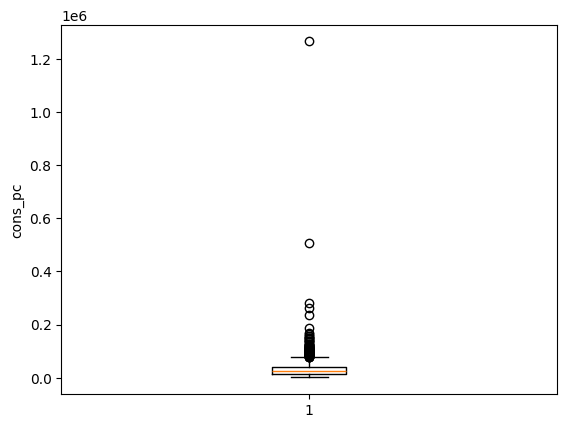

In [322]:
plt.boxplot(m_df_less_0s['cons_pc'])
plt.ylabel('cons_pc');

In [282]:
X_0s = pd.DataFrame(scaler_m.transform(m_df_less_0s[['nightlights']]))
y_0s = m_df_less_0s['cons_pc']

In [285]:
X_0s.rename(columns={0:'nightlights'},inplace=True)

(0.0, 600000.0)

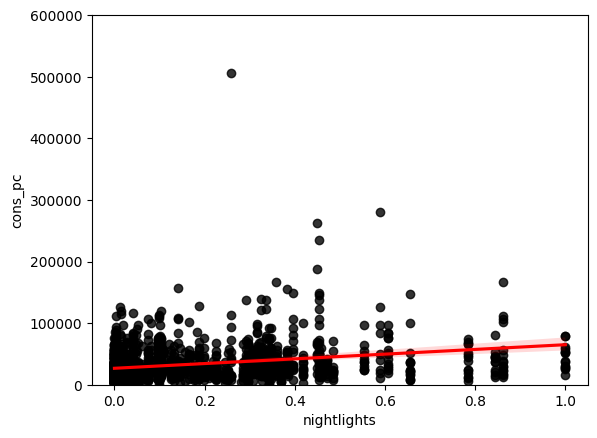

In [286]:
sns.regplot(m_df_less_0s,x=X_0s,y=y_0s,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.ylim(0,600000)

In [298]:
m_df_less_0s.corr()

,cons_pc,cluster_lat,cluster_lon,nightlights
cons_pc,1.000000,-0.031784,0.039270,0.195904
cluster_lat,-0.031784,1.000000,0.172395,0.019963
cluster_lon,0.039270,0.172395,1.000000,0.081693
nightlights,0.195904,0.019963,0.081693,1.000000


In [295]:
model_less_0s = LinearRegression()

# Define cross-validation strategy
kf = KFold(n_splits=10, shuffle=True)

# Perform cross-validation
scores = cross_val_score(model_less_0s, X_0s, y_0s, cv=kf, scoring=make_scorer(r2_score))

In [297]:
scores.mean()

0.05173106029649588

In [56]:
data = pd.read_csv('raw_data/ethiopia_10_by_10_ready.csv', sep=',')

In [199]:
data

,country,cluster_lat,cluster_lon,cons_pc,nightlights
0,eth,14.086276,37.983187,7.324780,0.000204
1,eth,13.670993,37.406426,9.611530,0.000152
2,eth,10.858521,36.887649,8.676843,0.000600
3,eth,7.276738,38.115738,6.227012,0.009504
4,eth,14.129428,39.560886,4.538552,0.000198
...,...,...,...,...,...
322,eth,13.445120,39.455448,8.572332,0.095925
323,eth,8.149280,38.830618,8.392769,0.009988
324,eth,7.170938,38.601886,15.097178,0.047693
325,eth,9.220795,42.495224,12.006629,0.000631


In [67]:
data['nightlights'].astype('float64').value_counts()

nightlights
0.000000    197
0.020875      2
0.107431      2
0.008249      2
0.070480      2
           ... 
0.032912      1
0.002156      1
0.001243      1
0.031277      1
0.000624      1
Name: count, Length: 322, dtype: int64

In [171]:
data = drop_0s(data)
data.head(3)

,country,cluster_lat,cluster_lon,cons_pc,nightlights
0,eth,14.086276,37.983187,7.324780,0.000204
1,eth,13.670993,37.406426,9.611530,0.000152
2,eth,10.858521,36.887649,8.676843,0.000600


In [138]:
data['nightlights'].value_counts()

nightlights
0.000000    19
0.006145     2
0.004031     2
0.000472     2
0.036751     2
            ..
0.000562     1
0.193020     1
0.000222     1
0.003261     1
0.002245     1
Name: count, Length: 322, dtype: int64

In [139]:
# Initiate the scaler
scaler = MinMaxScaler()

In [140]:
# Initiate X (apply scaler) and y
X = pd.DataFrame(scaler.fit_transform(data[['nightlights']]))
y = data['cons_pc']

In [141]:
# Reinstantiate column name on X
X.rename(columns={0:'nightlights'},inplace=True)
len(X)

345

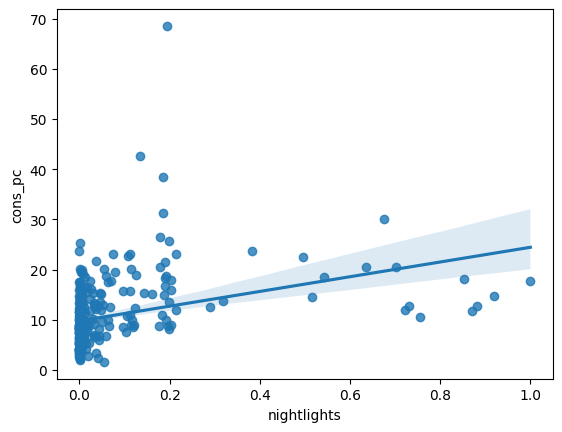

In [142]:
sns.regplot(x=X,y=y);

In [143]:
model = LinearRegression()
k_folds = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv = k_folds)
scores.mean()

0.06721150374256121

In [144]:
scores

array([ 0.08346946, -0.06231152,  0.08610719,  0.16824126,  0.06055113])

In [145]:
data_Xy = data[['nightlights','cons_pc']]

In [146]:
data_Xy.head()

,nightlights,cons_pc
0,0.011557,9.494947
1,0.105329,10.780241
2,0.002172,5.292447
3,0.000613,8.324623
4,0.000044,23.640701


In [147]:
data_Xy.corr()

,nightlights,cons_pc
nightlights,1.000000,0.348377
cons_pc,0.348377,1.000000


In [176]:
#K-fold CV without data leakage
def k_fold_cv(df):
    #isolate nightlights and cons_pc columns
    df = df[['nightlights','cons_pc']]
    
    #train test split
    train_data, test_data = train_test_split(df, test_size=0.3)

    #define scaler
    scaler = MinMaxScaler()
    
    # Ready X's and y's
    X_train = pd.DataFrame(scaler.fit_transform(train_data[['nightlights']]))
    y_train = train_data['cons_pc']

    X_test = pd.DataFrame(scaler.fit_transform(test_data[['nightlights']]))
    y_test = test_data['cons_pc']
    n_split = 5
    len_split = int(df.shape[0]/n_split)

    # Initialize the 1st fold
    scores = []
    start = 0
    stop = len_split

    # Start the n-split fold CV
    for k in range(n_split): # k in [0,1,2,3,4]
        data_val = df.iloc[start:stop, :]
        data_train = df.drop(index=data_val.index)
        y_train = data_train['cons_pc']
        X_train = data_train.drop(columns=['cons_pc'])
        y_val = data_val['cons_pc']
        X_val = data_val.drop(columns=['cons_pc'])
        
        #fit model
        model_k = LinearRegression()
        model_k.fit(X_train, y_train)
        
        #append score to scores list
        scores.append(model_k.score(X_val, y_val))
        
        # Setup next fold
        start = stop
        stop += len_split

    # Display the mean score and the scores standard deviation
    print(np.array(scores).mean())
    print(np.array(scores).std())

In [177]:
k_fold_cv(data_Xy)

0.06721150374256121
0.07436256239846484


In [178]:
data['nightlights'] = scaler.transform(data[['nightlights']])

In [183]:
data

,country,cluster_lat,cluster_lon,cons_pc,nightlights
0,eth,14.086276,37.983187,7.324780,0.000204
1,eth,13.670993,37.406426,9.611530,0.000152
2,eth,10.858521,36.887649,8.676843,0.000600
3,eth,7.276738,38.115738,6.227012,0.009504
4,eth,14.129428,39.560886,4.538552,0.000198
...,...,...,...,...,...
322,eth,13.445120,39.455448,8.572332,0.095925
323,eth,8.149280,38.830618,8.392769,0.009988
324,eth,7.170938,38.601886,15.097178,0.047693
325,eth,9.220795,42.495224,12.006629,0.000631


In [150]:
addis_ab_df = data[
    (data['cluster_lat'] >= 8.9) & (data['cluster_lat'] <= 9.1) &
    (data['cluster_lon'] >= 38.7) & (data['cluster_lon'] <= 38.9)
]

In [201]:
addis_ab_df

,country,cluster_lat,cluster_lon,cons_pc,nightlights
5,eth,9.052935,38.735117,18.578238,0.542717
10,eth,9.023574,38.784249,11.709447,0.871594
12,eth,9.071813,38.729929,13.792394,0.319315
28,eth,9.015257,38.813750,20.499866,0.702203
35,eth,9.037509,38.737811,11.936232,0.721796
42,eth,8.964058,38.721902,20.488550,0.634796
78,eth,9.061072,38.791779,12.539863,0.288456
116,eth,8.989751,38.773653,17.768381,1.000000
117,eth,9.020116,38.733379,18.206968,0.851894
128,eth,8.957485,38.762128,10.622940,0.755613


In [151]:
#Get co-ords for city boundaries of next 10 most populous cities

dire_dawa_df = data[
    (data['cluster_lat'] >= 9.57) & (data['cluster_lat'] <= 9.64) &
    (data['cluster_lon'] >= 41.8) & (data['cluster_lon'] <= 41.9)
]
mekelle_df = data[
    (data['cluster_lat'] >= 13.45) & (data['cluster_lat'] <= 13.53) &
    (data['cluster_lon'] >= 39.4) & (data['cluster_lon'] <= 39.5)
]
adama_df = data[
    (data['cluster_lat'] >= 8.49) & (data['cluster_lat'] <= 8.59) &
    (data['cluster_lon'] >= 39.2) & (data['cluster_lon'] <= 39.3)
]
awassa_df = data[
    (data['cluster_lat'] >= 7.0) & (data['cluster_lat'] <= 7.11) &
    (data['cluster_lon'] >= 38.46) & (data['cluster_lon'] <= 38.53)
]
bahir_dar_df = data[
    (data['cluster_lat'] >= 11.53) & (data['cluster_lat'] <= 11.63) &
    (data['cluster_lon'] >= 37.3) & (data['cluster_lon'] <= 37.47)
]
gonder_df = data[
    (data['cluster_lat'] >= 12.57) & (data['cluster_lat'] <= 12.63) &
    (data['cluster_lon'] >= 37.43) & (data['cluster_lon'] <= 37.485)
]
dessie_df = data[
    (data['cluster_lat'] >= 11.09) & (data['cluster_lat'] <= 11.17) &
    (data['cluster_lon'] >= 39.61) & (data['cluster_lon'] <= 39.66)
]
jimma_df = data[
    (data['cluster_lat'] >= 7.65) & (data['cluster_lat'] <= 7.703) &
    (data['cluster_lon'] >= 36.8) & (data['cluster_lon'] <= 36.87)
]
jijiga_df = data[
    (data['cluster_lat'] >= 9.33) & (data['cluster_lat'] <= 9.374) &
    (data['cluster_lon'] >= 42.77) & (data['cluster_lon'] <= 42.823)
]
shashamane_df = data[
    (data['cluster_lat'] >= 7.16) & (data['cluster_lat'] <= 7.233) &
    (data['cluster_lon'] >= 38.56) & (data['cluster_lon'] <= 38.65)
]

In [152]:
second_eleventh_city_df = pd.concat([dire_dawa_df,mekelle_df,adama_df,awassa_df,bahir_dar_df,gonder_df,dessie_df,jimma_df,jijiga_df,shashamane_df],axis=0)

In [153]:
second_eleventh_city_df.reset_index(drop=True,inplace=True)

In [174]:
second_eleventh_city_df.head(3)

,country,cluster_lat,cluster_lon,cons_pc,nightlights
0,eth,9.616200,41.849856,10.780241,0.105329
1,eth,9.593121,41.880643,15.696920,0.112995
2,eth,9.603999,41.865387,9.959210,0.115454


In [160]:
k_fold_cv(second_eleventh_city_df)

-0.6523093182268628
0.7973812277748411


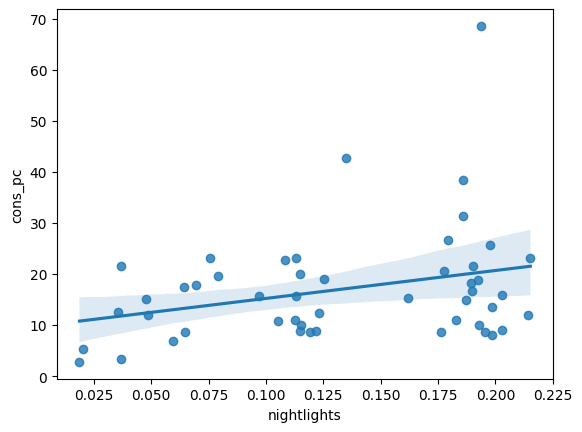

In [161]:
sns.regplot(x=second_eleventh_city_df[['nightlights']],y=second_eleventh_city_df['cons_pc']);

In [162]:
second_eleventh_city_df.drop(columns=['country','cluster_lat','cluster_lon']).corr()

,cons_pc,nightlights
cons_pc,1.000000,0.299529
nightlights,0.299529,1.000000


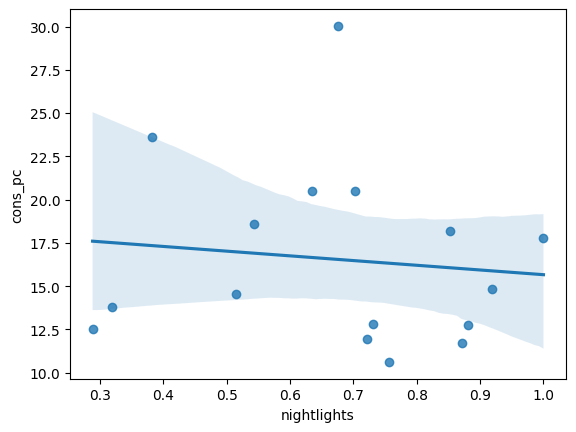

In [163]:
sns.regplot(x=addis_ab_df[['nightlights']],y=addis_ab_df['cons_pc']);

In [164]:
addis_ab_df.drop(columns=['country','cluster_lat','cluster_lon']).corr()

,cons_pc,nightlights
cons_pc,1.00000,-0.11215
nightlights,-0.11215,1.00000


In [165]:
all_cities_df = pd.concat([addis_ab_df,second_eleventh_city_df],axis=0)

In [166]:
all_cities_df.reset_index(drop=True,inplace=True)

In [175]:
all_cities_df.head(3)

,country,cluster_lat,cluster_lon,cons_pc,nightlights
0,eth,9.052935,38.735117,18.578238,0.542717
1,eth,9.023574,38.784249,11.709447,0.871594
2,eth,9.071813,38.729929,13.792394,0.319315


In [168]:
all_cities_df.drop(columns=['country','cluster_lat','cluster_lon']).corr()

,cons_pc,nightlights
cons_pc,1.000000,0.029402
nightlights,0.029402,1.000000


In [180]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True)

# Perform cross-validation
scores = cross_val_score(model_xgb, X, y, cv=kf, scoring=make_scorer(r2_score))

In [181]:
scores

array([-1.1784265 , -0.12782852, -0.02441208, -0.63734921, -0.22350478])